In [53]:
import bql
import numpy as np
from IPython.display import display, clear_output
import pandas as pd
import time 
import datetime

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

bq = bql.Service()
d = bq.data
f = bq.func
u = bq.univ

In [54]:
#INPUTS    ********************
asset_list=['IBE SM Equity', 'SAN SM Equity', 'ITX SM Equity', 'TEF SM Equity']
cur='EUR'
start_date = datetime.datetime(2018, 5, 12)
end_date = datetime.datetime(2018, 6, 12)

In [55]:
def norm_corr(as1, as2, st_date, e_date, cur):
    price = d.px_last(start = st_date, end = e_date, fill='prev', currency = cur)
    price = f.zscore(price)
    base_price = f.value(price, u.list(as1))
    correlation = f.corr(base_price, price)

    request = bql.Request(as2, {'Cor': correlation}) #si optimizas esta parte y haces que as2 sea una lista de valores te ahorras el segundo bucle
    res = bq.execute(request)
    cor_res = res[0].df()
    
    return cor_res.iloc[0]['Cor']

def correlDist(corr):
    dist = ((1-corr)/2)**0.5
    return dist

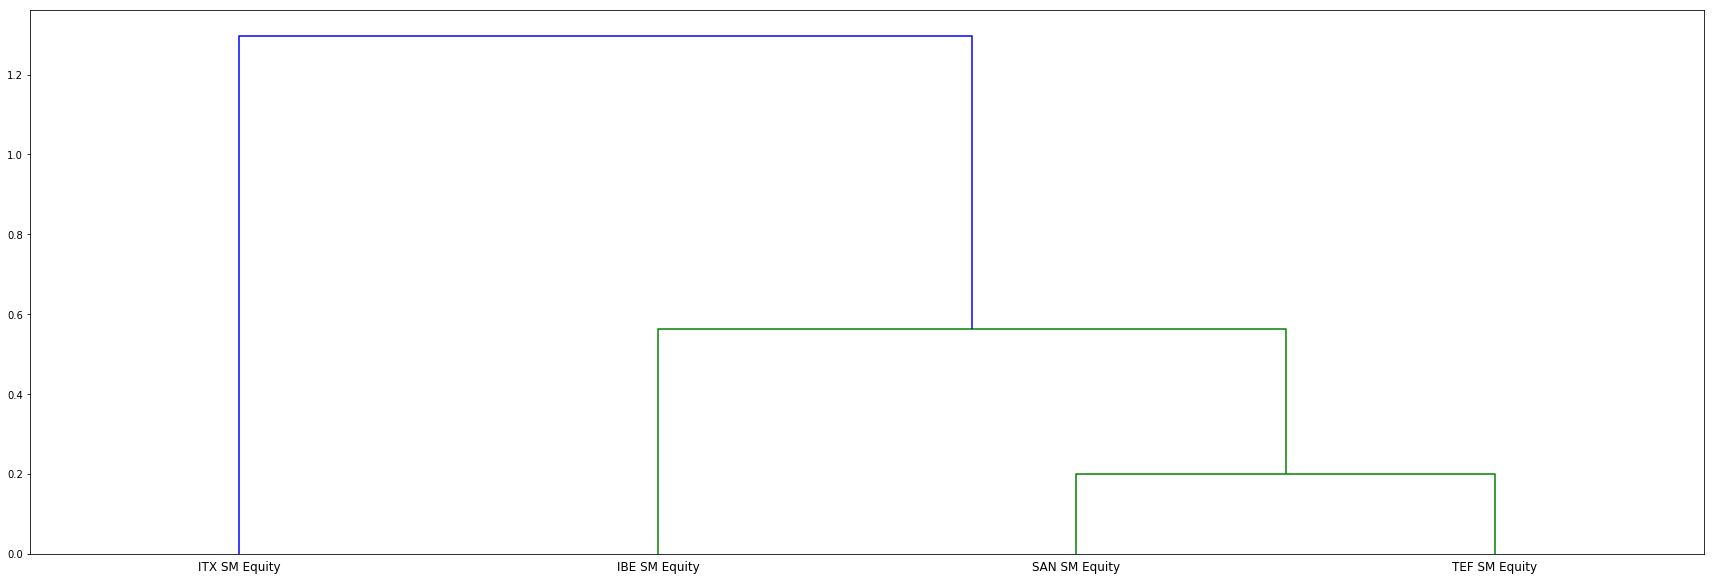

In [56]:
###############    MAIN    ###############

#Calculate Correlation Matrix
count = 0
for asset1 in asset_list:
    aux_cor_list=[]
    for asset2 in asset_list:
        aux_cor_list.append(norm_corr(asset1,asset2,start_date,end_date,cur))
        
    if count == 0:
        Correl_Matrix = pd.DataFrame({asset1: pd.Series(aux_cor_list, index = asset_list)})
    else:
        aux_Correl_Matrix = pd.DataFrame({asset1: pd.Series(aux_cor_list, index = asset_list)})
        Correl_Matrix = pd.concat([Correl_Matrix, aux_Correl_Matrix],axis = 1)
        
    count += 1

Z = linkage(correlDist(Correl_Matrix))

plt.figure(figsize=(30, 10), facecolor='w')
dendrogram(Z, labels = asset_list)
plt.show()